### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [2]:
df = pd.read_csv('Gun_Violence.csv')
df.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2714225,24-Sep-23,Oklahoma,Oklahoma City,SW 26th St and S Agnew Ave,0,5,0,0,0,NaN
1,2713963,23-Sep-23,Hawaii,Waianae,85-491 Farrington Hwy,2,2,0,0,0,NaN
2,2713920,23-Sep-23,Virginia,Chesapeake,1300 block of Drayton Rd,0,5,0,0,0,NaN
3,2713404,23-Sep-23,California,Downey,11018 Downey Ave,0,4,0,0,0,NaN
4,2714081,23-Sep-23,District of Columbia,Washington,1360 H St NE,0,4,0,0,0,NaN


In [3]:
df.columns

Index(['Incident ID', 'Incident Date', 'State', 'City Or County', 'Address',
       'Victims Killed', 'Victims Injured', 'Suspects Killed',
       'Suspects Injured', 'Suspects Arrested', 'Operations'],
      dtype='object')

### Renaming the columns

In [4]:
df.rename(columns={'Incident ID': 'Incident_ID', 'Incident Date':'Incident_Date',
                    'City Or County': 'City_Country', 'Victims Killed':'Victims_Killed', 
                     'Victims Injured': 'Victims_Injured', 'Suspects Killed':'Suspects_Killed',
                       'Suspects Injured':'Suspects_Injured', 'Suspects Arrested': 'Suspects_Arrested'}, inplace =True)
df.columns

Index(['Incident_ID', 'Incident_Date', 'State', 'City_Country', 'Address',
       'Victims_Killed', 'Victims_Injured', 'Suspects_Killed',
       'Suspects_Injured', 'Suspects_Arrested', 'Operations'],
      dtype='object')

In [5]:
df.describe()

,Incident_ID,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested,Operations
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,0.0
mean,2.277142e+06,0.988000,4.095000,0.053500,0.055500,0.563500,NaN
std,2.571887e+05,1.360434,2.354729,0.235936,0.297429,1.048579,NaN
min,1.799307e+06,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.060825e+06,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
50%,2.289118e+06,1.000000,4.000000,0.000000,0.000000,0.000000,NaN
75%,2.497527e+06,1.000000,5.000000,0.000000,0.000000,1.000000,NaN
max,2.714225e+06,21.000000,32.000000,2.000000,5.000000,11.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident_ID        2000 non-null   int64  
 1   Incident_Date      2000 non-null   object 
 2   State              2000 non-null   object 
 3   City_Country       2000 non-null   object 
 4   Address            1989 non-null   object 
 5   Victims_Killed     2000 non-null   int64  
 6   Victims_Injured    2000 non-null   int64  
 7   Suspects_Killed    2000 non-null   int64  
 8   Suspects_Injured   2000 non-null   int64  
 9   Suspects_Arrested  2000 non-null   int64  
 10  Operations         0 non-null      float64
dtypes: float64(1), int64(6), object(4)
memory usage: 172.0+ KB


In [7]:
df.dtypes

Incident_ID            int64
Incident_Date         object
State                 object
City_Country          object
Address               object
Victims_Killed         int64
Victims_Injured        int64
Suspects_Killed        int64
Suspects_Injured       int64
Suspects_Arrested      int64
Operations           float64
dtype: object

In [8]:
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'])

In [9]:
# Check how to make the string data type conversion 
df['State'] =df['State'].astype(str)
df['City_Country'] =df['City_Country'].astype(str)
df['Address'] =df['Address'].astype(str)

In [10]:
df.dtypes

Incident_ID                   int64
Incident_Date        datetime64[ns]
State                        object
City_Country                 object
Address                      object
Victims_Killed                int64
Victims_Injured               int64
Suspects_Killed               int64
Suspects_Injured              int64
Suspects_Arrested             int64
Operations                  float64
dtype: object

In [11]:
df['Operations'].isna().sum()

2000

In [12]:
# Dropping the Operations column because it contains null value
df.drop(columns=['Operations'], inplace = True)
df.head()

,Incident_ID,Incident_Date,State,City_Country,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested
0,2714225,2023-09-24,Oklahoma,Oklahoma City,SW 26th St and S Agnew Ave,0,5,0,0,0
1,2713963,2023-09-23,Hawaii,Waianae,85-491 Farrington Hwy,2,2,0,0,0
2,2713920,2023-09-23,Virginia,Chesapeake,1300 block of Drayton Rd,0,5,0,0,0
3,2713404,2023-09-23,California,Downey,11018 Downey Ave,0,4,0,0,0
4,2714081,2023-09-23,District of Columbia,Washington,1360 H St NE,0,4,0,0,0


In [13]:
df.isna().sum()

Incident_ID          0
Incident_Date        0
State                0
City_Country         0
Address              0
Victims_Killed       0
Victims_Injured      0
Suspects_Killed      0
Suspects_Injured     0
Suspects_Arrested    0
dtype: int64

In [14]:
# Checking for duplicates in the data
df.duplicated().sum()

0

In [15]:
df['State'].unique()

array(['Oklahoma', 'Hawaii', 'Virginia', 'California',
       'District of Columbia', 'Minnesota', 'Florida', 'North Carolina',
       'Texas', 'Illinois', 'Massachusetts', 'Colorado', 'Indiana',
       'Mississippi', 'Pennsylvania', 'Michigan', 'New Jersey',
       'South Carolina', 'New York', 'Georgia', 'Alabama', 'Ohio',
       'Kentucky', 'Utah', 'Washington', 'Wisconsin', 'Delaware',
       'Louisiana', 'Tennessee', 'Arkansas', 'Missouri', 'Arizona',
       'Maryland', 'North Dakota', 'Iowa', 'Kansas', 'Idaho', 'Oregon',
       'New Mexico', 'New Hampshire', 'Nevada', 'Connecticut', 'Maine',
       'Nebraska', 'South Dakota', 'West Virginia', 'Rhode Island',
       'Alaska'], dtype=object)

In [16]:
df['City_Country'].unique()

array(['Oklahoma City', 'Waianae', 'Chesapeake', 'Downey', 'Washington',
       'Minneapolis', 'Orlando', 'Pomona', 'Spring Lake', 'Charlotte',
       'El Paso', 'Romeoville', 'Boston', 'Denver', 'South Bend',
       'Tchula', 'Philadelphia', 'Palm Bay', 'Detroit', 'Indianapolis',
       'Jersey City', 'Chicago', 'Rock Hill', 'Dallas', 'Brooklyn',
       'Jackson', 'El Paso (Socorro)', 'Dublin', 'Birmingham', 'Atlanta',
       'Freeport', 'High Point', 'Galveston', 'Lynn', 'Myrtle Beach',
       'Houston', 'Peoria', 'Rochester', 'Mansfield', 'Louisville',
       'Cleveland', 'Pueblo', 'Orem', 'Ripley', 'Tallahassee', 'Pasadena',
       'Hartville', 'Trabuco Canyon', 'Warren (Howland)', 'Upper Darby',
       'Valley Stream', 'Seattle', 'Denison', 'Milwaukee', 'Macon',
       'Wilmington', 'Norfolk', 'Alexandria', 'East Saint Louis',
       'Clarksville', 'Memphis', 'Harrisburg', 'Cincinnati', 'Rockford',
       'Grand Rapids', 'Bothell', 'Pine Bluff', 'Marysville',
       'Crystal Lake'

In [17]:
# Converting the Incident_Date column to Months and Days of the Week
df['Incident_Month'] = df['Incident_Date'].dt.month_name()
df['Incident_Weekday'] = df['Incident_Date'].dt.day_name()
df.head()

,Incident_ID,Incident_Date,State,City_Country,Address,Victims_Killed,Victims_Injured,Suspects_Killed,Suspects_Injured,Suspects_Arrested,Incident_Month,Incident_Weekday
0,2714225,2023-09-24,Oklahoma,Oklahoma City,SW 26th St and S Agnew Ave,0,5,0,0,0,September,Sunday
1,2713963,2023-09-23,Hawaii,Waianae,85-491 Farrington Hwy,2,2,0,0,0,September,Saturday
2,2713920,2023-09-23,Virginia,Chesapeake,1300 block of Drayton Rd,0,5,0,0,0,September,Saturday
3,2713404,2023-09-23,California,Downey,11018 Downey Ave,0,4,0,0,0,September,Saturday
4,2714081,2023-09-23,District of Columbia,Washington,1360 H St NE,0,4,0,0,0,September,Saturday


In [18]:
# Gun violence by states
gun_violence_states = pd.pivot_table( 
                                df,
                                index= ['State'],
                                values= ['Incident_ID'],
                                aggfunc= np.sum,
                                sort =True
                ).reset_index()
print('Top 10 states with the highest occurrence of gun violence (Descending)')
gun_violence_states.sort_values(by= 'Incident_ID', ascending = False).head(10)

Top 10 states with the highest occurrence of gun violence (Descending)


,State,Incident_ID
13,Illinois,446379403
42,Texas,373142744
4,California,319218321
37,Pennsylvania,238706132
9,Florida,225307357
18,Louisiana,212429243
31,New York,204151205
34,Ohio,187975244
10,Georgia,174066773
32,North Carolina,168622885


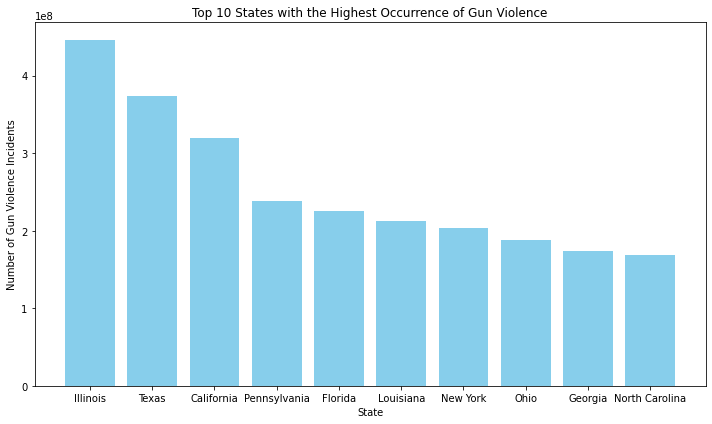

In [19]:
top_10_states = gun_violence_states.sort_values(by='Incident_ID', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_states['State'], top_10_states['Incident_ID'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Gun Violence Incidents')
plt.title('Top 10 States with the Highest Occurrence of Gun Violence')
plt.xticks(rotation=0)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [20]:
gun_violence_states.sort_values(by= 'Incident_ID', ascending = False).tail(10)

,State,Incident_ID
43,Utah,7213636
46,West Virginia,5886564
1,Alaska,5722356
11,Hawaii,5286923
12,Idaho,4779485
28,New Hampshire,4661821
38,Rhode Island,4083870
33,North Dakota,2653198
19,Maine,2575621
40,South Dakota,2163617


In [21]:
# Gun violence by months
gun_violence_months = pd.pivot_table( 
                                df,
                                index= ['Incident_Month'],
                                values= ['Incident_ID'],
                                aggfunc= np.sum,
                                sort =True
                ).reset_index()
print('Months with the highest occurrence of gun violence (Descending)')
gun_violence_months.sort_values(by= 'Incident_ID', ascending = False)

Months with the highest occurrence of gun violence (Descending)


,Incident_Month,Incident_ID
5,July,613626853
8,May,497476054
6,June,480035549
11,September,434400082
1,August,432623082
10,October,398828130
0,April,373081935
9,November,300670531
7,March,284586055
4,January,271300063


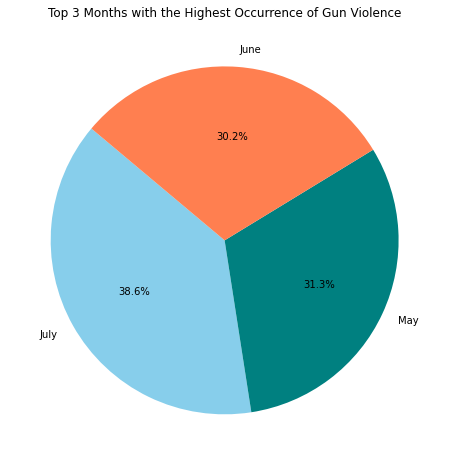

In [22]:
top_3_months = gun_violence_months.sort_values(by='Incident_ID', ascending=False).head(3)

plt.figure(figsize=(8, 8))
plt.pie(top_3_months['Incident_ID'], labels=top_3_months['Incident_Month'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'teal', 'coral'])
plt.title('Top 3 Months with the Highest Occurrence of Gun Violence')
plt.show()

#### July is the month with the most gun violence 

In [23]:
# See if you can add mean and sum in the same aggfunc
gun_violence_killings = pd.pivot_table( 
                                df,
                                index= ['Incident_Month'],
                                values= ['Victims_Killed'],
                                aggfunc= np.sum,
                                sort =True
                ).reset_index()
print('Months with the highest occurrence of gun violence killings (Descending)')
gun_violence_killings.sort_values(by= 'Victims_Killed', ascending = False)

Months with the highest occurrence of gun violence killings (Descending)


,Incident_Month,Victims_Killed
8,May,228
5,July,205
6,June,200
10,October,194
0,April,170
7,March,162
4,January,158
1,August,151
11,September,148
9,November,140


In [24]:
gun_violence_injured = pd.pivot_table( 
                                df,
                                index= ['Incident_Month'],
                                values= ['Victims_Injured'],
                                aggfunc= np.mean,
                                sort =True
                ).reset_index()
print('Months with the highest occurrence of gun violence killings (Descending)')
gun_violence_injured.sort_values(by= 'Victims_Injured', ascending = False)

Months with the highest occurrence of gun violence killings (Descending)


,Incident_Month,Victims_Injured
5,July,4.407692
6,June,4.381643
0,April,4.306748
8,May,4.288372
10,October,4.021622
1,August,3.961538
9,November,3.950000
7,March,3.929134
11,September,3.900000
3,February,3.896552


In [25]:
# Killed and Injured per month
killed_and_injured = gun_violence_injured.merge(gun_violence_killings, on = 'Incident_Month') 
killed_and_injured

,Incident_Month,Victims_Injured,Victims_Killed
0,April,4.306748,170
1,August,3.961538,151
2,December,3.673684,99
3,February,3.896552,121
4,January,3.783333,158
5,July,4.407692,205
6,June,4.381643,200
7,March,3.929134,162
8,May,4.288372,228
9,November,3.950000,140


In [26]:
gun_violence_day = pd.pivot_table( 
                                df,
                                index= ['Incident_Weekday'],
                                values= ['Incident_ID'],
                                aggfunc= np.sum,
                                sort =True
                ).reset_index()

gun_violence_day.sort_values(by= 'Incident_ID', ascending = False)

,Incident_Weekday,Incident_ID
3,Sunday,1291709915
2,Saturday,1075802432
0,Friday,563991899
1,Monday,450397817
6,Wednesday,445504061
5,Tuesday,365343086
4,Thursday,361534470


### Most of the gun violence occurs during the Weekends with Sunday the most frequent day

### Looking at the number of suspects injured,killed or arrested to give some sort of mental image of the response of the police or other security personnel 

In [27]:
suspects_killed = pd.pivot_table(
                                df,
                                index = ['State'],
                                values= ['Suspects_Killed'],
                                aggfunc = 'sum').reset_index()

suspects_killed_by_state = suspects_killed.sort_values(by='Suspects_Killed', ascending=False).head(10)
suspects_killed_by_state

,State,Suspects_Killed
42,Texas,11
41,Tennessee,7
13,Illinois,6
9,Florida,6
4,California,6
47,Wisconsin,5
10,Georgia,5
2,Arizona,5
39,South Carolina,4
35,Oklahoma,4


In [28]:
suspects_arrested = pd.pivot_table(
                                df,
                                index = ['State'],
                                values= ['Suspects_Arrested'],
                                aggfunc = 'sum').reset_index()

suspects_arrested_by_state = suspects_arrested.sort_values(by='Suspects_Arrested', ascending=False).head(10)
suspects_arrested_by_state

,State,Suspects_Arrested
42,Texas,98
4,California,83
39,South Carolina,74
37,Pennsylvania,62
10,Georgia,56
9,Florida,51
24,Mississippi,50
31,New York,49
18,Louisiana,49
13,Illinois,45


In [29]:
suspects_injured = pd.pivot_table(
                                df,
                                index = ['State'],
                                values= ['Suspects_Injured'],
                                aggfunc = 'sum').reset_index()

suspects_injured_data = suspects_injured.sort_values(by='Suspects_Injured', ascending=False).head(10)
suspects_injured_data

,State,Suspects_Injured
42,Texas,10
18,Louisiana,8
47,Wisconsin,7
9,Florida,7
37,Pennsylvania,5
13,Illinois,5
10,Georgia,5
34,Ohio,5
4,California,5
43,Utah,5


In [30]:
suspects_injured_and_arrested = pd.merge(suspects_injured_data, suspects_arrested_by_state, on='State')
suspects_data = pd.merge(suspects_injured_and_arrested, suspects_killed_by_state, on='State')
print('States with the highest response rate to gun violence')
suspects_data

States with the highest response rate to gun violence


,State,Suspects_Injured,Suspects_Arrested,Suspects_Killed
0,Texas,10,98,11
1,Florida,7,51,6
2,Illinois,5,45,6
3,Georgia,5,56,5
4,California,5,83,6


### Conclusion:

### Findings:


1. Top 10 states with the most gun violence:

             Illinois	
             Texas	
             California	
             Pennsylvania	
             Florida	
             Louisiana	
             New York	
             Ohio
             Georgia	
             North Carolina	

2. July is the month with the highest occurence of gun violence
3. Most gun attacks occur during the weekends with Sunday being the most likely day for an attack
4. Out of the top 10 States with the most gun violence, the following states have a better response to gun attacks given that suspects are arrested, injured or killed:

            Texas
            Florida
            Illinois
            Georgia
            California	

### Recommendation:
The fact that the states listed above made arrests does not necessarily signify progress as these arrests are way lower than the recorded cases of gun attacks. 

1. I recommend more arrests and active security personnels in states with high occurence of gun violence to curb such attacks
2. Education and sensitization of individuals of the dangers and consequences of gun violence 
    